In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re

%matplotlib inline

In [2]:
with open('socAttrAndSeqFusion(full).txt') as mash:
    data = mash.readlines()
data = list(map(lambda x: re.sub('-1|-2|\n', '', x).split(), data))
# переводим из строки в список, выкидывая разделители

data = [person for person in data if len(person) > 4]
# первые четыре элемента - описание человека, нас интересует то, что идет после.
# Если там ничего нет, то этого человека выбрасываем из рассмотрения, поскольку он не дает никакой информации

In [3]:
print(data[0:5])
# все успешно записано в список, можно строить гистограммы

[['gender=1', 'generation=6', 'education=1', 'place=1', 'work', 'separation', 'partner', 'marriage', 'children'], ['gender=1', 'generation=6', 'education=2', 'place=1', 'work', 'separation'], ['gender=1', 'generation=3', 'education=1', 'place=1', 'work', 'separation', 'marriage', 'children'], ['gender=0', 'generation=5', 'education=1', 'place=1', 'separation', 'work', 'marriage', 'children', 'partner'], ['gender=1', 'generation=2', 'education=2', 'place=1', 'work', 'marriage', 'children', 'separation']]


## Задание 1 (2 балла). Поиск частых событий.

#### 1) Какое событие чаще всего является первым у каждого поколения? 

Строим гистограммы для первого события у всех поколений:

In [4]:
First_events = list(zip(*data))[4]

Generations = list(zip(*data))[1]
Generations = list(map(lambda x: re.sub('generation=', '', x), Generations))
# Оставляем только интересующие нас числа, текст вырезаем

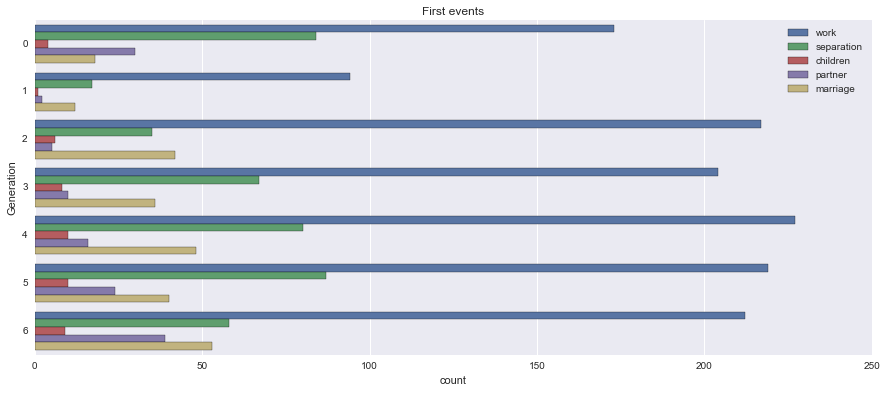

In [5]:
plt.figure(figsize=(15,6))
plt.title('First events')
plt.ylabel('Generation')
sb.countplot(y=Generations, hue=First_events)

Как видно из гистограммы, для абсолютно всех поколений самым частым первым событием является работа (причем чаще в разы)

#### 2) Какое событие чаще всего является последним у каждого поколения?

Опять строим гистограммы:

In [6]:
Last_events = [element[-1] for element in data]

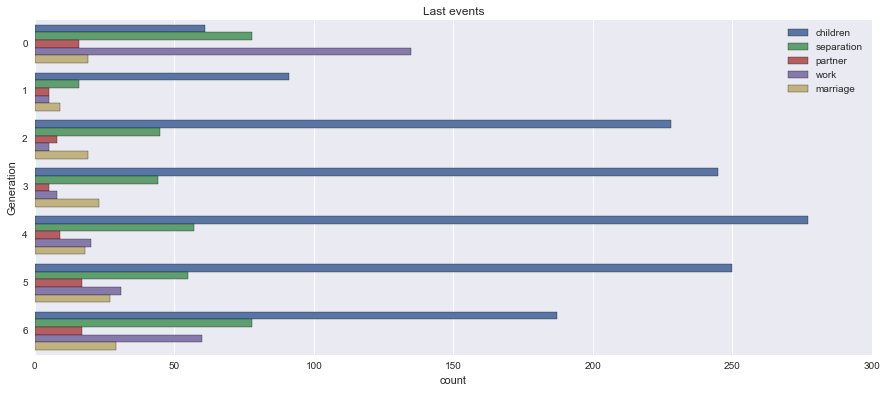

In [7]:
plt.figure(figsize=(15,6))
plt.title('Last events')
plt.ylabel('Generation')
sb.countplot(y=Generations, hue=Last_events)

Видим, что для всех поколений, кроме поколения "0" самым частым последним событием являются дети, 
а для поколения 0 -- все равно самым частым последним событием остается работа.

#### 3) Аналогичные вопросы для признака “пол” и комбинаций признаков “поколение”и “пол”.

1) Строим гистограммы для признака "пол":

In [8]:
Genders = list(zip(*data))[0]
Genders = list(map(lambda x: re.sub('gender=', '', x), Genders))

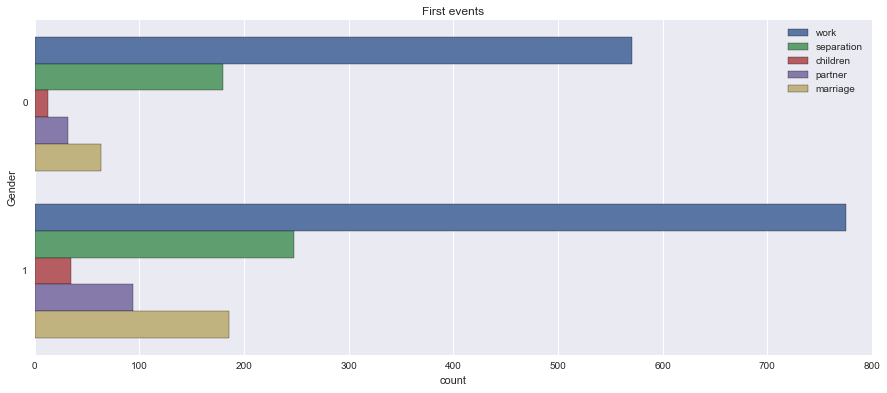

In [9]:
plt.figure(figsize=(15,6))
plt.title('First events')
plt.ylabel('Gender')
sb.countplot(y=Genders, hue=First_events)

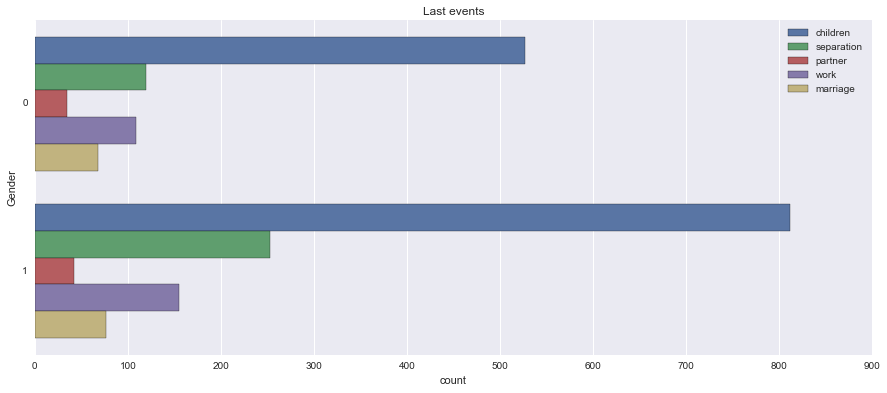

In [10]:
plt.figure(figsize=(15,6))
plt.title('Last events')
plt.ylabel('Gender')
sb.countplot(y=Genders, hue=Last_events)

Как видно из гистограмм, и для мужчин, и для женщин самое частое первое событие -- это работа, а самое частое последнее событие -- дети.

2) Объединяем поколение и пол и смотрим на гистограммы для всех возможных 14 комбинаций:

In [11]:
Genr_and_Gendr = list(zip(Generations, Genders))
Genr_and_Gendr = list(map(lambda x: ', '.join(x), Genr_and_Gendr))

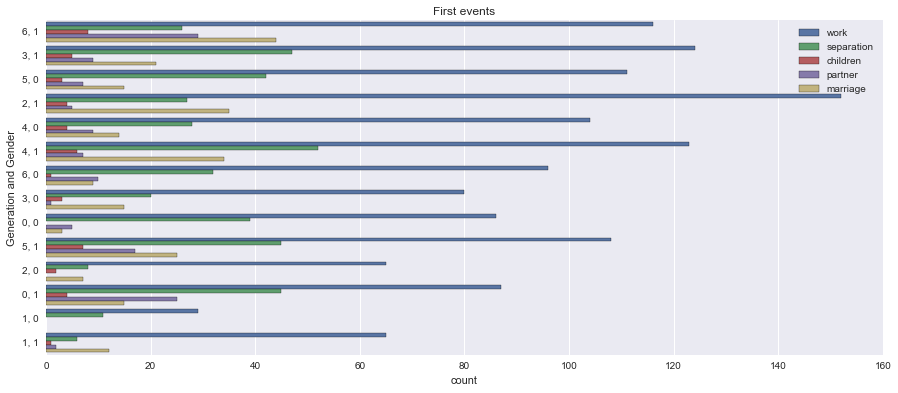

In [12]:
plt.figure(figsize=(15,6))
plt.title('First events')
plt.ylabel('Generation and Gender')
sb.countplot(y=Genr_and_Gendr, hue=First_events)

Как легко можно заметить, для всех комбинаций "поколение-пол" самым частым первым событием является работа.

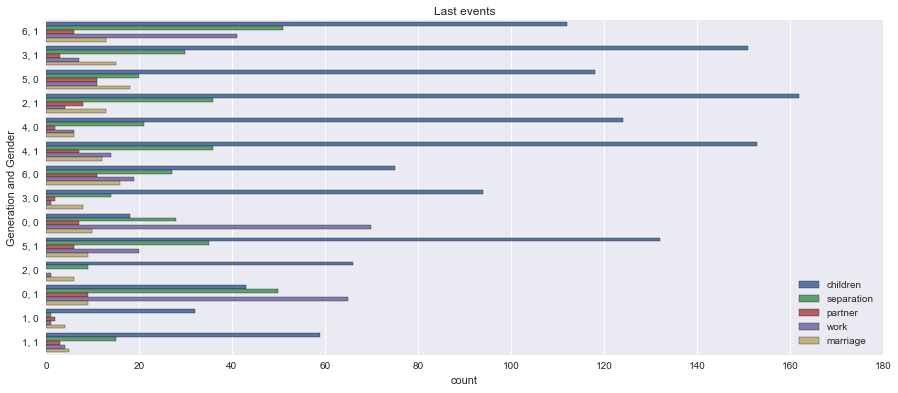

In [13]:
plt.figure(figsize=(15,6))
plt.title('Last events')
plt.ylabel('Generation and Gender')
sb.countplot(y=Genr_and_Gendr, hue=Last_events)

У всех комбинаций "поколение-пол", кроме "0-0" и "0-1" самым частым последним событием являются дети.
У комбинаций "0-0" и "0-1" самым частым последним событием также является работа.

## Задание 2 (5 баллов).

#### 1) Определить число частых и частых замкнутых поледовательностей при $minsupp=1\%^*$. 

Всего частных последовательностей 125.

Всего частных замкнутых последовательностей 122.

$^*$ 1 было интепретировано как 1%, так как если принять 1 за 100%, то получится, что у всех объектов одна и та же последовательность, чего в нашем случае, конечно, нет. Если же 1 интерпретировать как 1 объект, то получим, что у каждой последовательности, которая там имеется, должен быть один объект поддержки - тот, в котором она встречается (т.е. мы тогда рассмотрим все последовательности которые встретились). 

#### 2) Какая последовательность событий наиболее частая в группе мужчин, а какая– в группе женщин (длины 2, 3, 4 и 5)?

Сначала нужно разделить объекты по гендеру:

In [14]:
gender0 = []
gender1 = []

with open('socAttrAndSeqFusion(full).txt') as mash:
    data = mash.readlines()
for person in data:
    event_seq = ' '.join(person.split()[8:])
    #начинается с 8 элемента, вначале описание и 4 разделителя
    gender = person.split('gender=')[1][0]
    if gender == '0':
        gender0.append(event_seq)
    else:
        gender1.append(event_seq)

Теперь запишем их в отдельные .txt файлы.

In [15]:
output0 = open('gender0.txt', 'w')
output0.write('\n'.join(gender0))
output0.close()

In [16]:
output1 = open('gender1.txt', 'w')
output1.write('\n'.join(gender1))
output1.close()

Для gender_0:

Наиболее частая последовательность длины:

2 work, children (sup = 514)

3 work, marriage, children (sup = 362)

4 work, separation, marriage, children (sup = 95)

5 work, separation, partner, marriage, children (sup = 10)

Для gender_1:

Наиболее частая последовательность длины:

2 marriage, children (sup = 782)

3 work, marriage, children (sup = 480)

4 work, marriage, separation, children (sup = 156)

5 work, partner, marriage, separation, children (sup = 17)

#### 3) Аналогичные пунктам 1 и 2 вопросы для комбинаций признаков “поколение” и “пол” (без ограничения на длину).

Сначала нужно разделить объекты по поколениям и гендеру, всего 14 комбинаций:

In [17]:
gen_sex = [[] for i in range(14)]

with open('socAttrAndSeqFusion(full).txt') as mash:
    line1 = mash.readlines()
    
for person in line1:
    generation = int(person.split('generation=')[1][0])
    sex = int(person.split('gender=')[1][0])
    seq = ' '.join(person.split()[8:])
    gen_sex[7*sex+generation].append(seq)

Запишем это в отдельный .txt файл:

In [18]:
for i in range(len(gen_sex)):
    f_out = open('gen'+str(i % 7)+'_sex'+str(i // 7)+'.txt','w')
    f_out.write('\n'.join(gen_sex[i]))
    f_out.close()

Распишем частые и замкнутые частые последовательности для всех 14 пар (x,y), где x - generation, y - gender(sex). 

Для (0,0):

Всего частых последовательностей 67.

Всего замкнутых частых: 56

Самая часто встречаемая последовательность: work (sup = 118).

Для (0,1):

Всего частых последовательностей 74.

Всего замкнутых частых: 73

Самая часто встречаемая последовательность: work (sup = 130).

Для (1,0):

Всего частых последовательностей 99.

Всего замкнутых частых: 41

Самая часто встречаемая последовательность: marriage (sup = 38).

Для (1,1):

Всего частых последовательностей 114.

Всего замкнутых частых: 58

Самая часто встречаемая последовательность: marriage (sup = 73).

Для (2,0):

Всего частых последовательностей 98.

Всего замкнутых частых: 62

Самая часто встречаемая последовательность: marriage (sup = 79).

Для (2,1):

Всего частых последовательностей 110.

Всего замкнутых частых: 94

Самая часто встречаемая последовательность: marriage (sup = 208).

Для (3,0):

Всего частых последовательностей 96.

Всего замкнутых частых: 77

Самая часто встречаемая последовательность: marriage (sup = 113).

Для (3,1):

Всего частых последовательностей 115.

Всего замкнутых частых: 103

Самая часто встречаемая последовательность: marriage (sup = 191).

Для (4,0):

Всего частых последовательностей 139.

Всего замкнутых частых: 121

Самые часто встречаемые последовательности: children & marriage (sup = 151).

Для (4,1):

Всего частых последовательностей 125.

Всего замкнутых частых: 113

Самая часто встречаемая последовательность: marriage (sup = 206).

Для (5,0):

Всего частых последовательностей 166.

Всего замкнутых частых: 136

Самая часто встречаемая последовательность: work (sup = 156).

Для (5,1):

Всего частых последовательностей 151.

Всего замкнутых частых: 133

Самая часто встречаемая последовательность: children (sup = 189).

Для (6,0):

Всего частых последовательностей 142.

Всего замкнутых частых: 123

Самая часто встречаемая последовательность: work (sup = 206).

Для (6,1):

Всего частых последовательностей 157.

Всего замкнутых частых: 143

Самая часто встречаемая последовательность: children (sup = 182).

#### 4) Постройте все последовательностные ассоциативные правила для женщин и для мужчин (minsupp=1, minconf=0,5) и приведите примеры трех самых достоверных для этих двух типов правил.

Для того чтобы найти ассоциативные правила, воспользуемся SPMF, для которого мы предварительно занумеруем события:

In [19]:
all_events = ['children', 'marriage', 'partner', 'separation', 'work']

def numerator(gender):
    with open('gender' + gender + '.txt') as path:
        data = path.readlines()
    data = list(map(lambda x: re.sub('-1|-2|\n', '', x).split(), data))
    # делаем все как в начале, выкидывая разделители
    data = list(map(lambda x: sorted([str(all_events.index(event) + 1) for event in x]) , data))
    # мы сортируем людей, иначе опять получим мешанину
    # +1 нужно для того, чтобы мы получили события с номерами от 1 до 5, а не от 0 до 4
    output = open('gender' + gender + '_new.txt', 'w')
    output.write('\n'.join([' '.join(x) for x in data]))
    output.close()
    
numerator('0')
numerator('1')

Ассоциативные правила для пола "0" с минимальной поддержкой в 1% и минимальной достоверностью 0,5:

2 ==> 1 #SUP: 615 #CONF: 0.9138187221396731

1 ==> 2 #SUP: 615 #CONF: 0.9564541213063764

3 ==> 1 #SUP: 168 #CONF: 0.7368421052631579

4 ==> 1 #SUP: 534 #CONF: 0.8030075187969925

1 ==> 4 #SUP: 534 #CONF: 0.8304821150855366

5 ==> 1 #SUP: 559 #CONF: 0.7453333333333333

1 ==> 5 #SUP: 559 #CONF: 0.8693623639191291

3 ==> 2 #SUP: 179 #CONF: 0.7850877192982456

4 ==> 2 #SUP: 559 #CONF: 0.8406015037593985

2 ==> 4 #SUP: 559 #CONF: 0.8306092124814265

5 ==> 2 #SUP: 585 #CONF: 0.78

2 ==> 5 #SUP: 585 #CONF: 0.8692421991084696

3 ==> 4 #SUP: 192 #CONF: 0.8421052631578947

3 ==> 5 #SUP: 203 #CONF: 0.8903508771929824

5 ==> 4 #SUP: 599 #CONF: 0.7986666666666666

4 ==> 5 #SUP: 599 #CONF: 0.9007518796992481

2 3 ==> 1 #SUP: 156 #CONF: 0.8715083798882681

1 3 ==> 2 #SUP: 156 #CONF: 0.9285714285714286

3 ==> 1 2 #SUP: 156 #CONF: 0.6842105263157895

2 4 ==> 1 #SUP: 513 #CONF: 0.9177101967799642

1 4 ==> 2 #SUP: 513 #CONF: 0.9606741573033708

1 2 ==> 4 #SUP: 513 #CONF: 0.8341463414634146

4 ==> 1 2 #SUP: 513 #CONF: 0.7714285714285715

2 ==> 1 4 #SUP: 513 #CONF: 0.7622585438335809

1 ==> 2 4 #SUP: 513 #CONF: 0.7978227060653188

2 5 ==> 1 #SUP: 538 #CONF: 0.9196581196581196

1 5 ==> 2 #SUP: 538 #CONF: 0.962432915921288

1 2 ==> 5 #SUP: 538 #CONF: 0.8747967479674796

5 ==> 1 2 #SUP: 538 #CONF: 0.7173333333333334

2 ==> 1 5 #SUP: 538 #CONF: 0.799405646359584

1 ==> 2 5 #SUP: 538 #CONF: 0.8367029548989113

3 4 ==> 1 #SUP: 141 #CONF: 0.734375

1 3 ==> 4 #SUP: 141 #CONF: 0.8392857142857143

3 ==> 1 4 #SUP: 141 #CONF: 0.618421052631579

3 5 ==> 1 #SUP: 150 #CONF: 0.7389162561576355

1 3 ==> 5 #SUP: 150 #CONF: 0.8928571428571429

3 ==> 1 5 #SUP: 150 #CONF: 0.6578947368421053

4 5 ==> 1 #SUP: 488 #CONF: 0.8146911519198664

1 5 ==> 4 #SUP: 488 #CONF: 0.8729874776386404

1 4 ==> 5 #SUP: 488 #CONF: 0.9138576779026217

5 ==> 1 4 #SUP: 488 #CONF: 0.6506666666666666

4 ==> 1 5 #SUP: 488 #CONF: 0.7338345864661654

1 ==> 4 5 #SUP: 488 #CONF: 0.7589424572317263

3 4 ==> 2 #SUP: 149 #CONF: 0.7760416666666666

2 3 ==> 4 #SUP: 149 #CONF: 0.8324022346368715

3 ==> 2 4 #SUP: 149 #CONF: 0.6535087719298246

3 5 ==> 2 #SUP: 158 #CONF: 0.7783251231527094

2 3 ==> 5 #SUP: 158 #CONF: 0.88268156424581

3 ==> 2 5 #SUP: 158 #CONF: 0.6929824561403509

4 5 ==> 2 #SUP: 510 #CONF: 0.8514190317195326

2 5 ==> 4 #SUP: 510 #CONF: 0.8717948717948718

2 4 ==> 5 #SUP: 510 #CONF: 0.9123434704830053

5 ==> 2 4 #SUP: 510 #CONF: 0.68

4 ==> 2 5 #SUP: 510 #CONF: 0.7669172932330827

2 ==> 4 5 #SUP: 510 #CONF: 0.7578008915304606

3 5 ==> 4 #SUP: 175 #CONF: 0.8620689655172413

3 4 ==> 5 #SUP: 175 #CONF: 0.9114583333333334

3 ==> 4 5 #SUP: 175 #CONF: 0.7675438596491229

2 3 4 ==> 1 #SUP: 129 #CONF: 0.8657718120805369

1 3 4 ==> 2 #SUP: 129 #CONF: 0.9148936170212766

1 2 3 ==> 4 #SUP: 129 #CONF: 0.8269230769230769

3 4 ==> 1 2 #SUP: 129 #CONF: 0.671875

2 3 ==> 1 4 #SUP: 129 #CONF: 0.7206703910614525

1 3 ==> 2 4 #SUP: 129 #CONF: 0.7678571428571429

3 ==> 1 2 4 #SUP: 129 #CONF: 0.5657894736842105

2 3 5 ==> 1 #SUP: 139 #CONF: 0.879746835443038

1 3 5 ==> 2 #SUP: 139 #CONF: 0.9266666666666666

1 2 3 ==> 5 #SUP: 139 #CONF: 0.8910256410256411

3 5 ==> 1 2 #SUP: 139 #CONF: 0.6847290640394089

2 3 ==> 1 5 #SUP: 139 #CONF: 0.776536312849162

1 3 ==> 2 5 #SUP: 139 #CONF: 0.8273809523809523

3 ==> 1 2 5 #SUP: 139 #CONF: 0.6096491228070176

2 4 5 ==> 1 #SUP: 470 #CONF: 0.9215686274509803

1 4 5 ==> 2 #SUP: 470 #CONF: 0.9631147540983607

1 2 5 ==> 4 #SUP: 470 #CONF: 0.8736059479553904

1 2 4 ==> 5 #SUP: 470 #CONF: 0.9161793372319688

4 5 ==> 1 2 #SUP: 470 #CONF: 0.7846410684474123

2 5 ==> 1 4 #SUP: 470 #CONF: 0.8034188034188035

2 4 ==> 1 5 #SUP: 470 #CONF: 0.8407871198568873

1 5 ==> 2 4 #SUP: 470 #CONF: 0.8407871198568873

1 4 ==> 2 5 #SUP: 470 #CONF: 0.8801498127340824

1 2 ==> 4 5 #SUP: 470 #CONF: 0.7642276422764228

5 ==> 1 2 4 #SUP: 470 #CONF: 0.6266666666666667

4 ==> 1 2 5 #SUP: 470 #CONF: 0.706766917293233

2 ==> 1 4 5 #SUP: 470 #CONF: 0.6983655274888558

1 ==> 2 4 5 #SUP: 470 #CONF: 0.7309486780715396

3 4 5 ==> 1 #SUP: 129 #CONF: 0.7371428571428571

1 3 5 ==> 4 #SUP: 129 #CONF: 0.86

1 3 4 ==> 5 #SUP: 129 #CONF: 0.9148936170212766

3 5 ==> 1 4 #SUP: 129 #CONF: 0.6354679802955665

3 4 ==> 1 5 #SUP: 129 #CONF: 0.671875

1 3 ==> 4 5 #SUP: 129 #CONF: 0.7678571428571429

3 ==> 1 4 5 #SUP: 129 #CONF: 0.5657894736842105

3 4 5 ==> 2 #SUP: 136 #CONF: 0.7771428571428571

2 3 5 ==> 4 #SUP: 136 #CONF: 0.8607594936708861

2 3 4 ==> 5 #SUP: 136 #CONF: 0.912751677852349

3 5 ==> 2 4 #SUP: 136 #CONF: 0.6699507389162561

3 4 ==> 2 5 #SUP: 136 #CONF: 0.7083333333333334

2 3 ==> 4 5 #SUP: 136 #CONF: 0.7597765363128491

3 ==> 2 4 5 #SUP: 136 #CONF: 0.5964912280701754

2 3 4 5 ==> 1 #SUP: 118 #CONF: 0.8676470588235294

1 3 4 5 ==> 2 #SUP: 118 #CONF: 0.9147286821705426

1 2 3 5 ==> 4 #SUP: 118 #CONF: 0.8489208633093526

1 2 3 4 ==> 5 #SUP: 118 #CONF: 0.9147286821705426

3 4 5 ==> 1 2 #SUP: 118 #CONF: 0.6742857142857143

2 3 5 ==> 1 4 #SUP: 118 #CONF: 0.7468354430379747

2 3 4 ==> 1 5 #SUP: 118 #CONF: 0.7919463087248322

1 3 5 ==> 2 4 #SUP: 118 #CONF: 0.7866666666666666

1 3 4 ==> 2 5 #SUP: 118 #CONF: 0.8368794326241135

1 2 3 ==> 4 5 #SUP: 118 #CONF: 0.7564102564102564

3 5 ==> 1 2 4 #SUP: 118 #CONF: 0.5812807881773399

3 4 ==> 1 2 5 #SUP: 118 #CONF: 0.6145833333333334

2 3 ==> 1 4 5 #SUP: 118 #CONF: 0.659217877094972

1 3 ==> 2 4 5 #SUP: 118 #CONF: 0.7023809523809523

3 ==> 1 2 4 5 #SUP: 118 #CONF: 0.5175438596491229

Ассоциативные правила для пола "1" с минимальной поддержкой в 1% и минимальной достоверностью 0,5:

2 ==> 1 #SUP: 1017 #CONF: 0.9373271889400921

1 ==> 2 #SUP: 1017 #CONF: 0.9228675136116152

3 ==> 1 #SUP: 282 #CONF: 0.8417910447761194

4 ==> 1 #SUP: 898 #CONF: 0.8560533841754051

1 ==> 4 #SUP: 898 #CONF: 0.8148820326678766

5 ==> 1 #SUP: 898 #CONF: 0.8208409506398537

1 ==> 5 #SUP: 898 #CONF: 0.8148820326678766

3 ==> 2 #SUP: 271 #CONF: 0.808955223880597

4 ==> 2 #SUP: 896 #CONF: 0.8541468064823642

2 ==> 4 #SUP: 896 #CONF: 0.8258064516129032

5 ==> 2 #SUP: 894 #CONF: 0.8171846435100548

2 ==> 5 #SUP: 894 #CONF: 0.823963133640553

3 ==> 4 #SUP: 289 #CONF: 0.8626865671641791

3 ==> 5 #SUP: 287 #CONF: 0.8567164179104477

5 ==> 4 #SUP: 896 #CONF: 0.8190127970749543

4 ==> 5 #SUP: 896 #CONF: 0.8541468064823642

2 3 ==> 1 #SUP: 249 #CONF: 0.9188191881918819

1 3 ==> 2 #SUP: 249 #CONF: 0.8829787234042553

3 ==> 1 2 #SUP: 249 #CONF: 0.7432835820895523

2 4 ==> 1 #SUP: 847 #CONF: 0.9453125

1 4 ==> 2 #SUP: 847 #CONF: 0.9432071269487751

1 2 ==> 4 #SUP: 847 #CONF: 0.8328416912487709

4 ==> 1 2 #SUP: 847 #CONF: 0.8074356530028599

2 ==> 1 4 #SUP: 847 #CONF: 0.7806451612903226

1 ==> 2 4 #SUP: 847 #CONF: 0.7686025408348457

2 5 ==> 1 #SUP: 837 #CONF: 0.9362416107382551

1 5 ==> 2 #SUP: 837 #CONF: 0.9320712694877505

1 2 ==> 5 #SUP: 837 #CONF: 0.8230088495575221

5 ==> 1 2 #SUP: 837 #CONF: 0.7650822669104205

2 ==> 1 5 #SUP: 837 #CONF: 0.7714285714285715

1 ==> 2 5 #SUP: 837 #CONF: 0.7595281306715064

3 4 ==> 1 #SUP: 244 #CONF: 0.8442906574394463

1 3 ==> 4 #SUP: 244 #CONF: 0.8652482269503546

3 ==> 1 4 #SUP: 244 #CONF: 0.7283582089552239

3 5 ==> 1 #SUP: 244 #CONF: 0.8501742160278746

1 3 ==> 5 #SUP: 244 #CONF: 0.8652482269503546

3 ==> 1 5 #SUP: 244 #CONF: 0.7283582089552239

4 5 ==> 1 #SUP: 780 #CONF: 0.8705357142857143

1 5 ==> 4 #SUP: 780 #CONF: 0.8685968819599109

1 4 ==> 5 #SUP: 780 #CONF: 0.8685968819599109

5 ==> 1 4 #SUP: 780 #CONF: 0.7129798903107861

4 ==> 1 5 #SUP: 780 #CONF: 0.7435653002859867

1 ==> 4 5 #SUP: 780 #CONF: 0.7078039927404719

3 4 ==> 2 #SUP: 232 #CONF: 0.8027681660899654

2 3 ==> 4 #SUP: 232 #CONF: 0.8560885608856088

3 ==> 2 4 #SUP: 232 #CONF: 0.6925373134328359

3 5 ==> 2 #SUP: 231 #CONF: 0.8048780487804879

2 3 ==> 5 #SUP: 231 #CONF: 0.8523985239852399

3 ==> 2 5 #SUP: 231 #CONF: 0.6895522388059702

4 5 ==> 2 #SUP: 781 #CONF: 0.8716517857142857

2 5 ==> 4 #SUP: 781 #CONF: 0.8736017897091722

2 4 ==> 5 #SUP: 781 #CONF: 0.8716517857142857

5 ==> 2 4 #SUP: 781 #CONF: 0.7138939670932358

4 ==> 2 5 #SUP: 781 #CONF: 0.7445185891325071

2 ==> 4 5 #SUP: 781 #CONF: 0.719815668202765

3 5 ==> 4 #SUP: 253 #CONF: 0.8815331010452961

3 4 ==> 5 #SUP: 253 #CONF: 0.8754325259515571

3 ==> 4 5 #SUP: 253 #CONF: 0.755223880597015

2 3 4 ==> 1 #SUP: 215 #CONF: 0.9267241379310345

1 3 4 ==> 2 #SUP: 215 #CONF: 0.8811475409836066

1 2 3 ==> 4 #SUP: 215 #CONF: 0.8634538152610441

3 4 ==> 1 2 #SUP: 215 #CONF: 0.7439446366782007

2 3 ==> 1 4 #SUP: 215 #CONF: 0.7933579335793358

1 3 ==> 2 4 #SUP: 215 #CONF: 0.7624113475177305

3 ==> 1 2 4 #SUP: 215 #CONF: 0.6417910447761194

2 3 5 ==> 1 #SUP: 214 #CONF: 0.9264069264069265

1 3 5 ==> 2 #SUP: 214 #CONF: 0.8770491803278688

1 2 3 ==> 5 #SUP: 214 #CONF: 0.8594377510040161

3 5 ==> 1 2 #SUP: 214 #CONF: 0.7456445993031359

2 3 ==> 1 5 #SUP: 214 #CONF: 0.7896678966789668

1 3 ==> 2 5 #SUP: 214 #CONF: 0.7588652482269503

3 ==> 1 2 5 #SUP: 214 #CONF: 0.6388059701492538

2 4 5 ==> 1 #SUP: 738 #CONF: 0.9449423815620999

1 4 5 ==> 2 #SUP: 738 #CONF: 0.9461538461538461

1 2 5 ==> 4 #SUP: 738 #CONF: 0.8817204301075269

1 2 4 ==> 5 #SUP: 738 #CONF: 0.8713105076741441

4 5 ==> 1 2 #SUP: 738 #CONF: 0.8236607142857143

2 5 ==> 1 4 #SUP: 738 #CONF: 0.825503355704698

2 4 ==> 1 5 #SUP: 738 #CONF: 0.8236607142857143

1 5 ==> 2 4 #SUP: 738 #CONF: 0.821826280623608

1 4 ==> 2 5 #SUP: 738 #CONF: 0.821826280623608

1 2 ==> 4 5 #SUP: 738 #CONF: 0.7256637168141593

5 ==> 1 2 4 #SUP: 738 #CONF: 0.6745886654478976

4 ==> 1 2 5 #SUP: 738 #CONF: 0.7035271687321258

2 ==> 1 4 5 #SUP: 738 #CONF: 0.680184331797235

1 ==> 2 4 5 #SUP: 738 #CONF: 0.6696914700544465

3 4 5 ==> 1 #SUP: 217 #CONF: 0.857707509881423

1 3 5 ==> 4 #SUP: 217 #CONF: 0.889344262295082

1 3 4 ==> 5 #SUP: 217 #CONF: 0.889344262295082

3 5 ==> 1 4 #SUP: 217 #CONF: 0.7560975609756098

3 4 ==> 1 5 #SUP: 217 #CONF: 0.7508650519031141

1 3 ==> 4 5 #SUP: 217 #CONF: 0.7695035460992907

3 ==> 1 4 5 #SUP: 217 #CONF: 0.6477611940298508

3 4 5 ==> 2 #SUP: 204 #CONF: 0.8063241106719368

2 3 5 ==> 4 #SUP: 204 #CONF: 0.8831168831168831

2 3 4 ==> 5 #SUP: 204 #CONF: 0.8793103448275862

3 5 ==> 2 4 #SUP: 204 #CONF: 0.710801393728223

3 4 ==> 2 5 #SUP: 204 #CONF: 0.7058823529411765

2 3 ==> 4 5 #SUP: 204 #CONF: 0.7527675276752768

3 ==> 2 4 5 #SUP: 204 #CONF: 0.608955223880597

2 3 4 5 ==> 1 #SUP: 191 #CONF: 0.9362745098039216

1 3 4 5 ==> 2 #SUP: 191 #CONF: 0.880184331797235

1 2 3 5 ==> 4 #SUP: 191 #CONF: 0.8925233644859814

1 2 3 4 ==> 5 #SUP: 191 #CONF: 0.8883720930232558

3 4 5 ==> 1 2 #SUP: 191 #CONF: 0.7549407114624506

2 3 5 ==> 1 4 #SUP: 191 #CONF: 0.8268398268398268

2 3 4 ==> 1 5 #SUP: 191 #CONF: 0.8232758620689655

1 3 5 ==> 2 4 #SUP: 191 #CONF: 0.7827868852459017

1 3 4 ==> 2 5 #SUP: 191 #CONF: 0.7827868852459017

1 2 3 ==> 4 5 #SUP: 191 #CONF: 0.7670682730923695

3 5 ==> 1 2 4 #SUP: 191 #CONF: 0.6655052264808362

3 4 ==> 1 2 5 #SUP: 191 #CONF: 0.6608996539792388

2 3 ==> 1 4 5 #SUP: 191 #CONF: 0.7047970479704797

1 3 ==> 2 4 5 #SUP: 191 #CONF: 0.6773049645390071

3 ==> 1 2 4 5 #SUP: 191 #CONF: 0.5701492537313433

Три самых достоверных правила для пола «0»:

1 4 5 ==> 2 #SUP: 470 #CONF: 0.9631147540983607

1 5 ==> 2 #SUP: 538 #CONF: 0.962432915921288

1 4 ==> 2 #SUP: 513 #CONF: 0.9606741573033708

Три самых достоверных правила для пола «1»:

1 4 5 ==> 2 #SUP: 738 #CONF: 0.9461538461538461

2 4 ==> 1 #SUP: 847 #CONF: 0.9453125

2 4 5 ==> 1 #SUP: 738 #CONF: 0.9449423815620999

## Задание 3 (3 балла).

##### 1) Поиск частых множеств и ассоциативных правил.

Часто используется на таких сайтах как kinopoisk, avito, appstore и т.д. Обычно на сайтах есть пункт "вам может понравиться..." или "с этим приложением обычно скачивают...". Собственно это и есть использование частых множеств и ассоциативных правил, когда по нескольким объектам угадывают с большой долей вероятности и остальные объекты, которые могут войти в множество покупок, просмотров и так далее.

##### 2) Поиск частых (под)последовательностей.

При определений болезней с помощью частых подпоследовательностей можно находить связь между различными болезнями пациента. То есть считаем пациента за объект, а его болезни выстраиваем в последовательность событий. Так можно предугадывать будущие болезни уже по имеющимся заболеваниям. 

##### 3) Поиск частых (под)графов.

Анализ распространения болезней (эпидемий). Пример: https://xakep.ru/2007/08/23/39846/

Кидаем переносчиков болезни в вершины графов и соединяем их рёбрами с теми, кого/от кого они заразили(сь).